In [1]:
from dpks.quant_matrix import QuantMatrix

/home/erikh/dpks/test-venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
qm = QuantMatrix(
    quantification_file="../tests/input_files/data_sepsis.tsv",
    design_matrix_file="../tests/input_files/design_sepsis.tsv")

qm = (
    qm.normalize(
        method="mean",
    )
    .quantify(method="top_n")
)


In [3]:
qm = qm.classify(classifier="xgboost", shap_algorithm="tree", run_rfe=False, rfe_step=10, rfe_min_features_to_select=10)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


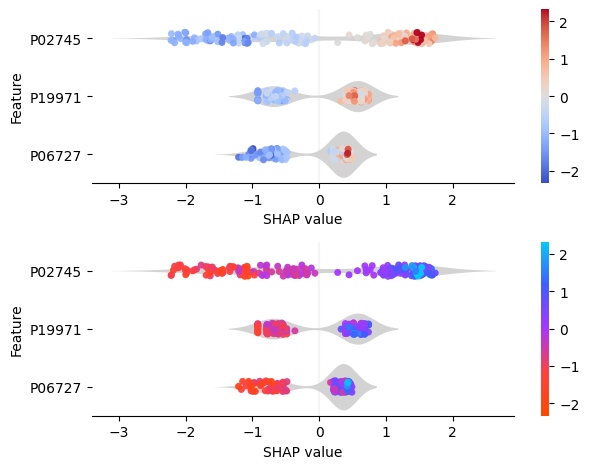

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)

qm.plot(plot_type='shap_summary', fig=fig, ax=axs[0], cmap="coolwarm", n_display=3)
qm.plot( plot_type='shap_summary', fig=fig, ax=axs[1], n_display=3)
plt.tight_layout()
plt.show()